In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import optimizers
import keras.utils as ker
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Flatten, Dropout
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

Using TensorFlow backend.


## Encoding Categorical Dataset

In [2]:
## Read data from csv file 'student-mat.csv'
math_data = pd.read_csv('student-mat.csv', sep=';')

## Read data from csv file 'student-por.csv'
por_data = pd.read_csv('student-por.csv', sep=';')

## Two datasets are similar except for the final 4 columns.
## Rename different columns.
math_data = math_data.rename(columns= {'absences': 'm_absences',
                                       'G1': 'M1',
                                       'G2': 'M2',
                                       'G3': 'M3'})
por_data = por_data.rename(columns= {'absences': 'p_absences',
                                       'G1': 'P1',
                                       'G2': 'P2',
                                       'G3': 'P3'})


## Missing data check. 
math_missing_data = math_data.isnull().sum()
## No missing data in math_data.
print()
por_missing_data = por_data.isnull().sum()
## No missing data in por_data


## Label Encode Sex. 0 = female, 1 = male
le_math = preprocessing.LabelEncoder()
le_math.fit(math_data['sex'])
math_sex_array = le_math.transform(math_data['sex'])
math_data['sex'] = math_sex_array
le_por = preprocessing.LabelEncoder()
le_por.fit(por_data['sex'])
por_sex_array = le_por.transform(por_data['sex'])
por_data['sex'] = por_sex_array


## Label Encode Parental Status. 0 = apart 1 = together 
le_math_Pstatus = preprocessing.LabelEncoder()
le_math_Pstatus.fit(math_data['Pstatus'])
math_Pstatus_array = le_math_Pstatus.transform(math_data['Pstatus'])
math_data['Pstatus'] = math_Pstatus_array
le_por_Pstatus = preprocessing.LabelEncoder()
le_por_Pstatus.fit(por_data['Pstatus'])
por_Pstatus_array = le_por_Pstatus.transform(por_data['Pstatus'])
por_data['Pstatus'] = por_Pstatus_array


## Label Encode Address (Urban or Rural). 1 = Urban 0 = Rural 
le_math_address = preprocessing.LabelEncoder()
le_math_address.fit(math_data['address'])
math_address_array = le_math_address.transform(math_data['address'])
math_data['address'] = math_address_array
le_por_address = preprocessing.LabelEncoder()
le_por_address.fit(por_data['address'])
por_address_array = le_por_address.transform(por_data['address'])
por_data['address'] = por_address_array


## Label Encode schoolsup (extra educational support) 1 = yes, 0 = no.
le_math_schoolsup = preprocessing.LabelEncoder()
le_math_schoolsup.fit(math_data['schoolsup'])
math_schoolsup_array = le_math_schoolsup.transform(math_data['schoolsup'])
math_data['schoolsup'] = math_schoolsup_array
le_por_schoolsup = preprocessing.LabelEncoder()
le_por_schoolsup.fit(por_data['schoolsup'])
por_schoolsup_array = le_por_schoolsup.transform(por_data['schoolsup'])
por_data['schoolsup'] = por_schoolsup_array


## Label Encode famsup (Family Support) 1 = yes, 0 = no
le_math_famsup = preprocessing.LabelEncoder()
le_math_famsup.fit(math_data['famsup'])
math_famsup_array = le_math_famsup.transform(math_data['famsup'])
math_data['famsup'] = math_famsup_array
le_por_famsup = preprocessing.LabelEncoder()
le_por_famsup.fit(por_data['famsup'])
por_famsup_array = le_por_famsup.transform(por_data['famsup'])
por_data['famsup'] = por_famsup_array


## Label Encode paid (extra paid classes within the course subject (Math or Portuguese)) 1 = yes, 0 = no
le_math_paid = preprocessing.LabelEncoder()
le_math_paid.fit(math_data['paid'])
math_paid_array = le_math_paid.transform(math_data['paid'])
math_data['paid'] = math_paid_array
le_por_paid= preprocessing.LabelEncoder()
le_por_paid.fit(por_data['paid'])
por_paid_array = le_por_paid.transform(por_data['paid'])
por_data['paid'] = por_paid_array


## Label Encode activities (extra-curricular activities) 1 = yes, 0 = no
le_math_activities = preprocessing.LabelEncoder()
le_math_activities.fit(math_data['activities'])
math_activities_array = le_math_activities.transform(math_data['activities'])
math_data['activities'] = math_activities_array
le_por_activities= preprocessing.LabelEncoder()
le_por_activities.fit(por_data['activities'])
por_activities_array = le_por_activities.transform(por_data['activities'])
por_data['activities'] = por_activities_array


## Label Encode nursery (attended nursery school) 1 = yes, 0 = no
le_math_nursery = preprocessing.LabelEncoder()
le_math_nursery.fit(math_data['nursery'])
math_nursery_array = le_math_nursery.transform(math_data['nursery'])
math_data['nursery'] = math_nursery_array
le_por_nursery= preprocessing.LabelEncoder()
le_por_nursery.fit(por_data['nursery'])
por_nursery_array = le_por_nursery.transform(por_data['nursery'])
por_data['nursery'] = por_nursery_array


## Label Encode higher (wants to take higher education) 1 = yes, 0 = no
le_math_higher = preprocessing.LabelEncoder()
le_math_higher.fit(math_data['higher'])
math_higher_array = le_math_higher.transform(math_data['higher'])
math_data['higher'] = math_higher_array
le_por_higher= preprocessing.LabelEncoder()
le_por_higher.fit(por_data['higher'])
por_higher_array = le_por_higher.transform(por_data['higher'])
por_data['higher'] = por_higher_array


## Label Encode internet (Internet access at home) 1 = yes, 2 = no
le_math_internet = preprocessing.LabelEncoder()
le_math_internet.fit(math_data['internet'])
math_internet_array = le_math_internet.transform(math_data['internet'])
math_data['internet'] = math_internet_array
le_por_internet= preprocessing.LabelEncoder()
le_por_internet.fit(por_data['internet'])
por_internet_array = le_por_internet.transform(por_data['internet'])
por_data['internet'] = por_internet_array


## Label Encode romantic (in a romantic relationship) 1 = yes, 2 = no
le_math_romantic = preprocessing.LabelEncoder()
le_math_romantic.fit(math_data['romantic'])
math_romantic_array = le_math_romantic.transform(math_data['romantic'])
math_data['romantic'] = math_romantic_array
le_por_romantic= preprocessing.LabelEncoder()
le_por_romantic.fit(por_data['romantic'])
por_romantic_array = le_por_romantic.transform(por_data['romantic'])
por_data['romantic'] = por_romantic_array

## Saving the new encoded datset as a CSV
export_math = math_data.to_csv('encoded_math_data.csv')
export_por = por_data.to_csv('encoded_por_data.csv')

## Math - Data Prep

In [3]:
## Read data from csv file with encoded data.
math_data = pd.read_csv('encoded_math_data.csv')

## Encoding Schools 
list_of_schools = []
for i in math_data['school']:
    if i == 'GP':
        school = 1
    else:
        school = 0
    list_of_schools.append(school)

math_data['school'] = list_of_schools

## One-hot encoding binary variables. 

school_one_hot = ker.to_categorical(math_data['school']).tolist()
sex_one_hot = ker.to_categorical(math_data['sex']).tolist()
address_one_hot = ker.to_categorical(math_data['address']).tolist()
pstatus_one_hot = ker.to_categorical(math_data['Pstatus']).tolist()
fedu_one_hot = ker.to_categorical(math_data['Fedu']).tolist()
medu_one_hot = ker.to_categorical(math_data['Medu']).tolist()
schoolsup_one_hot = ker.to_categorical(math_data['schoolsup']).tolist()
famsup_one_hot = ker.to_categorical(math_data['famsup']).tolist()
paid_one_hot = ker.to_categorical(math_data['paid']).tolist()
activities_one_hot = ker.to_categorical(math_data['activities']).tolist()
nursery_one_hot = ker.to_categorical(math_data['nursery']).tolist()
higher_one_hot = ker.to_categorical(math_data['higher']).tolist()
internet_one_hot = ker.to_categorical(math_data['internet']).tolist()
romantic_one_hot = ker.to_categorical(math_data['romantic']).tolist()

## Adding one-hot vectors to df
math_data['school_one_hot'] = school_one_hot
math_data['sex_one_hot'] = sex_one_hot
math_data['address_one_hot'] = address_one_hot
math_data['pstatus_one_hot'] = pstatus_one_hot
math_data['fedu_one_hot'] = fedu_one_hot
math_data['medu_one_hot'] = medu_one_hot
math_data['schoolsup_one_hot'] = schoolsup_one_hot
math_data['famsup_one_hot'] = famsup_one_hot
math_data['paid_one_hot'] = paid_one_hot
math_data['activities_one_hot'] = activities_one_hot
math_data['nursery_one_hot'] = nursery_one_hot
math_data['higher_one_hot'] = higher_one_hot
math_data['internet_one_hot'] = internet_one_hot
math_data['romantic_one_hot'] = romantic_one_hot

# Creating a new binary variable - 1 if student failed first grading period
previous_grade_list = []
for i in math_data['M1']:
    if i < 9.5: # Fail
        label = 1
    else: # Pass
        label = 0
    previous_grade_list.append(label)
math_data['previous_pass_fail'] = previous_grade_list

## Creating a new binary variable - 1 if both parents attended university. 
both_parents_college_list = []
for i in range(0, len(math_data)):
    if (math_data['Fedu'][i] == 4) & (math_data['Medu'][i] == 4):
        x = 1
    else:
        x = 0
    both_parents_college_list.append(x)
math_data['both_parents_college'] = both_parents_college_list

## Creating labels - Pass(0) or Fail(1)
list_of_labels = []
for i in math_data['M3']:
    if i < 9.5: # Fail
        label = 1
    else: # Pass
        label = 0
    list_of_labels.append(label)
math_data['label'] = list_of_labels


## Creating input vector (X)
X = []
for i in range(0, len(math_data)):
    x = []
#    x.append(math_data['age'][i])
    x.append(math_data['Medu'][i])
    x.append(math_data['Fedu'][i])
#    x.append(math_data['both_parents_college'][i])
#    x.append(math_data['studytime'][i])
#    x.append(math_data['famrel'][i])
#    x.append(math_data['freetime'][i])
    x.append(math_data['goout'][i])
    x.append(math_data['Dalc'][i])
    x.append(math_data['Walc'][i])
#    x.append(math_data['health'][i])
#    x.append(math_data['m_absences'][i])
    x.append(math_data['failures'][i])
    
#    x.extend(math_data['sex_one_hot'][i])
#    x.extend(math_data['address_one_hot'][i])
#    x.extend(math_data['pstatus_one_hot'][i])
#    x.extend(math_data['schoolsup_one_hot'][i])
#    x.extend(math_data['famsup_one_hot'][i])
    x.extend(math_data['paid_one_hot'][i])
#    x.extend(math_data['activities_one_hot'][i])
#    x.extend(math_data['nursery_one_hot'][i])
#    x.extend(math_data['school_one_hot'][i])
    x.extend(math_data['higher_one_hot'][i])
    x.extend(math_data['internet_one_hot'][i])
    x.extend(math_data['romantic_one_hot'][i])
    x.append(math_data['previous_pass_fail'][i])
    x.append(math_data['M1'][i])
    X.append(x)

Y = np.array(list_of_labels)
X = np.array(X)

## split dataset into train-test .
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=321, test_size=0.25, stratify=Y)

## Math - Modeling

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 18,817
Trainable params: 18,817
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Apply a constraint manually following the optimizer update step.
Train on 266 samples, validate on 30 samples
Epoch 1/36
266/266 [==============================] - 1s 2ms/sample - 

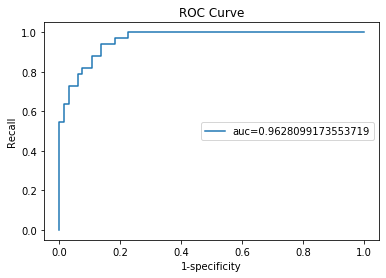

In [4]:
## DNN model utilizing TF's Keras API
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=X.shape[1:]))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy')
model.summary()
model.fit(X_train, y_train, epochs=36, batch_size=1, validation_split=0.1)
Y_pred = model.predict_classes(X_test)

## Metrics - 

print('\nPrecision score: {:.4f}'.format(precision_score(y_test, Y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, Y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, Y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test, Y_pred)))

print('\nClassification accuracy report:')
print(classification_report(y_test, Y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, Y_pred))

## Creating an ROC/AUC curve to visualize performance. 
classification_probs = model.predict_proba(X_test)
classification_AUC = roc_auc_score(y_test, classification_probs)  
print("\nAUC Index: {:.3f}".format(classification_AUC))
fpr, tpr, threshold = roc_curve(y_test,  classification_probs)
plt.plot(fpr,tpr,label="auc="+str(classification_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Precision score: 0.6410
Recall score: 0.7576
Accuracy score: 0.7778
F1 score: 0.6944

AUC Index: 0.7727272727272727


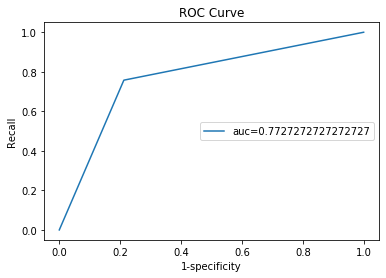

In [5]:
## Simple Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

## Decision Tree Metrics
tree_y_pred = tree.predict(X_test)
print('Precision score: {:.4f}'.format(precision_score(y_test, tree_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, tree_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, tree_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test, tree_y_pred)))

tree_probs = tree.predict_proba(X_test)
tree_AUC = roc_auc_score(y_test, tree_probs[:, 1]) ## Probability here just like lecture notes.
print("\nAUC Index:", tree_AUC)
fpr, tpr, threshold = roc_curve(y_test,  tree_probs[:, 1]) ## Probability here just like lecture notes.
plt.plot(fpr,tpr,label="auc="+str(tree_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Best Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}

Precision score: 0.6600
Recall score: 1.0000
Accuracy score: 0.8283
F1 score: 0.7952

AUC Index: 0.8712121212121212


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


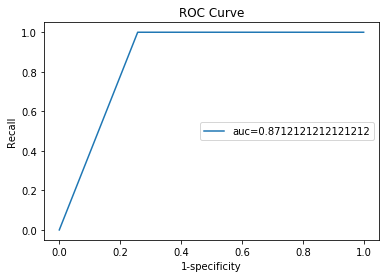

In [6]:
## Tuning hyperparameters of tree - cross-validated grid-search over a parameter grid.
optimized_tree = DecisionTreeClassifier()
params = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

opt_tree = GridSearchCV(optimized_tree, params, cv=5) ##  folds in stratified k-fold. 
opt_tree.fit(X_train,y_train)
print("Best Parameters:", opt_tree.best_params_)

## Grid Search Tree Metrics
grid_tree_y_pred = opt_tree.predict(X_test)
grid_tree_probs = opt_tree.predict_proba(X_test)
grid_tree_AUC = roc_auc_score(y_test, grid_tree_probs[:, 1])  ## Probability here just like lecture notes.

print('\nPrecision score: {:.4f}'.format(precision_score(y_test, grid_tree_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, grid_tree_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_tree_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test, grid_tree_y_pred)))

print("\nAUC Index:", grid_tree_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_tree_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(grid_tree_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show() 

Precision score: 0.7500
Recall score: 0.9091
Accuracy score: 0.8687
F1 score: 0.8219

AUC Index: 0.9336547291092747


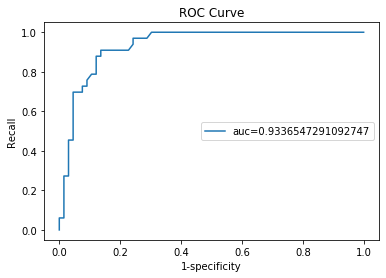

In [7]:
## Random Forest
random_forest_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, bootstrap=True)
random_forest_clf.fit(X_train, y_train)
rf_y_pred = random_forest_clf.predict(X_test)
rf_probs = random_forest_clf.predict_proba(X_test)

## Metrics
print('Precision score: {:.4f}'.format(precision_score(y_test,rf_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,rf_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,rf_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,rf_y_pred)))

rf_AUC = roc_auc_score(y_test, rf_probs[:, 1])  ## Probability here just like lecture notes.
print("\nAUC Index:", rf_AUC)
fpr, tpr, threshold = roc_curve(y_test,  rf_probs[:, 1])  ## Probability here just like lecture notes.
plt.plot(fpr,tpr,label="auc="+str(rf_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Precision score: 0.7632
Recall score: 0.8788
Accuracy score: 0.8687
F1 score: 0.8169

AUC Index: 0.9637281910009183


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


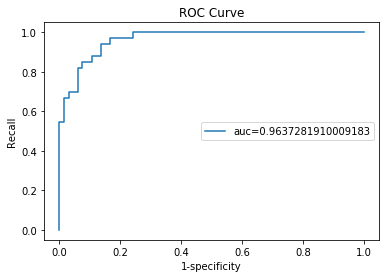

In [8]:
## Logistic Regression
log_regression = LogisticRegression().fit(X_train, y_train)
logistic_y_pred = log_regression.predict(X_test)
log_probs = log_regression.predict_proba(X_test)

## Metrics
print('Precision score: {:.4f}'.format(precision_score(y_test,logistic_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,logistic_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,logistic_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,logistic_y_pred)))

log_AUC = roc_auc_score(y_test, log_probs[:, 1])
print("\nAUC Index:", log_AUC)
fpr, tpr, threshold = roc_curve(y_test,  log_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(log_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Parameters: {'C': 0.0001}
Precision score: 1.0000
Recall score: 0.0303
Accuracy score: 0.6768
F1 score: 0.0588

AUC Index: 0.5151515151515151


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


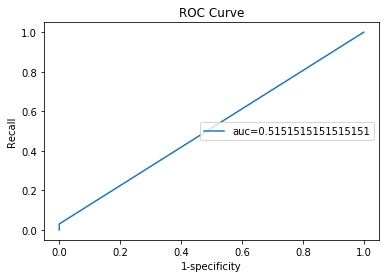

In [9]:
## Support Vector Machine (linear kernel function) - w/ hyperparameter (C) tuning. 
linear_svm = LinearSVC().fit(X_train, y_train)
params_svm = {'C': [.0001,.001,.01,.1,1,10,100,1000,10000]}

grid_svm = GridSearchCV(linear_svm, params_svm, cv=5, n_jobs=-1,scoring ='roc_auc', return_train_score=True)
grid_svm.fit(X_train, y_train)
print("Best Parameters:", grid_svm.best_params_)
grid_svm_y_pred = grid_svm.predict(X_test)

## SVM Metrics
print('Precision score: {:.4f}'.format(precision_score(y_test,grid_svm_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,grid_svm_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,grid_svm_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,grid_svm_y_pred)))

grid_svm_AUC = roc_auc_score(y_test, grid_svm_y_pred)  
print("\nAUC Index:", grid_svm_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_svm_y_pred)
plt.plot(fpr,tpr,label="auc="+str(grid_svm_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Best Parameters: {'C': 10, 'gamma': 0.0001}

Precision score: 0.7692
Recall score: 0.9091
Accuracy score: 0.8788
F1 score: 0.8333

AUC Index: 0.8863636363636365


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


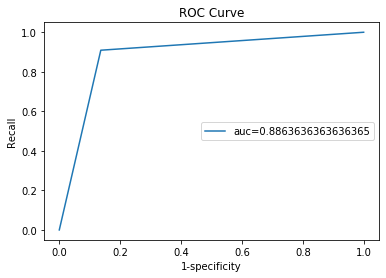

In [10]:
## Support Vector Machine (rbf/exp kernel function) - w/ hyperparameter (C and gamma) tuning. 
svm_kernel = SVC(kernel = 'rbf')

param_svm_kernel = {'C': [.0001,.001,.01,.1,1,10,100,1000,10000], 'gamma':[.0001,.001,.01,.1,1,10,100,1000,10000]}

grid_svm_kernel = GridSearchCV(svm_kernel, param_svm_kernel, cv=5, n_jobs=-1, scoring='roc_auc')
grid_svm_kernel.fit(X_train, y_train)

print("Best Parameters:", grid_svm_kernel.best_params_)
grid_rbf_svm_y_pred = grid_svm_kernel.predict(X_test)

## rbf SVM Metrics
print('\nPrecision score: {:.4f}'.format(precision_score(y_test,grid_rbf_svm_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,grid_rbf_svm_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,grid_rbf_svm_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,grid_rbf_svm_y_pred)))

grid_rbf_svm_AUC = roc_auc_score(y_test, grid_rbf_svm_y_pred)
print("\nAUC Index:", grid_rbf_svm_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_rbf_svm_y_pred)
plt.plot(fpr,tpr,label="auc="+str(grid_rbf_svm_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

## Portuguese - Data Prep

In [11]:
por_data = pd.read_csv('encoded_por_data.csv')

list_of_schools = []
for i in por_data['school']:
    if i == 'GP':
        school = 1
    else:
        school = 0
    list_of_schools.append(school)
por_data['school'] = list_of_schools

## One-hot encoding variables. 
sex_one_hot = ker.to_categorical(por_data['sex']).tolist()
address_one_hot = ker.to_categorical(por_data['address']).tolist()
pstatus_one_hot = ker.to_categorical(por_data['Pstatus']).tolist()
fedu_one_hot = ker.to_categorical(por_data['Fedu']).tolist()
medu_one_hot = ker.to_categorical(por_data['Medu']).tolist()
schoolsup_one_hot = ker.to_categorical(por_data['schoolsup']).tolist()
famsup_one_hot = ker.to_categorical(por_data['famsup']).tolist()
paid_one_hot = ker.to_categorical(por_data['paid']).tolist()
activities_one_hot = ker.to_categorical(por_data['activities']).tolist()
nursery_one_hot = ker.to_categorical(por_data['nursery']).tolist()
higher_one_hot = ker.to_categorical(por_data['higher']).tolist()
internet_one_hot = ker.to_categorical(por_data['internet']).tolist()
romantic_one_hot = ker.to_categorical(por_data['romantic']).tolist()

## Adding one-hot vectors to df.
por_data['sex_one_hot'] = sex_one_hot
por_data['address_one_hot'] = address_one_hot
por_data['pstatus_one_hot'] = pstatus_one_hot
por_data['fedu_one_hot'] = fedu_one_hot
por_data['medu_one_hot'] = medu_one_hot
por_data['schoolsup_one_hot'] = schoolsup_one_hot
por_data['famsup_one_hot'] = famsup_one_hot
por_data['paid_one_hot'] = paid_one_hot
por_data['activities_one_hot'] = activities_one_hot
por_data['nursery_one_hot'] = nursery_one_hot
por_data['higher_one_hot'] = higher_one_hot
por_data['internet_one_hot'] = internet_one_hot
por_data['romantic_one_hot'] = romantic_one_hot

# Creating a new binary variable - 1 if student failed first grading period
previous_grade_list = []
for i in por_data['P1']:
    if i < 9.5: # Fail
        label = 1
    else: # Pass
        label = 0
    previous_grade_list.append(label)
por_data['previous_pass_fail'] = previous_grade_list

## Creating a new binary variable - 1 if both parents attended university. 
both_parents_college_list = []
for i in range(0, len(por_data)):
    if (por_data['Fedu'][i] == 4) & (por_data['Medu'][i] == 4):
        x = 1
    else:
        x = 0
    both_parents_college_list.append(x)
por_data['both_parents_college'] = both_parents_college_list

## Creating labels - Pass(0) Fail(1) 
list_of_labels = []
## Pass - Fail grading scale
for i in por_data['P3']:
    if i < 9.5: # Fail
        label = 1
    else: # Pass
        label = 0
    list_of_labels.append(label)
por_data['label'] = list_of_labels


## Creating input vector
X = []
for i in range(0, len(por_data)):
    x = []
    
#    x.append(por_data['age'][i])
    x.append(por_data['Medu'][i])
    x.append(por_data['Fedu'][i])
#    x.append(por_data['both_parents_college'][i])
#    x.append(por_data['studytime'][i])
#    x.append(por_data['famrel'][i])
#    x.append(por_data['freetime'][i])
    x.append(por_data['goout'][i])
    x.append(por_data['Dalc'][i])
    x.append(por_data['Walc'][i])
#    x.append(por_data['health'][i])
#    x.append(por_data['m_absences'][i])
    x.append(por_data['failures'][i])
    
#    x.extend(por_data['sex_one_hot'][i])
#    x.extend(por_data['address_one_hot'][i])
#    x.extend(por_data['pstatus_one_hot'][i])
#    x.extend(por_data['schoolsup_one_hot'][i])
#    x.extend(por_data['famsup_one_hot'][i])
    x.extend(por_data['paid_one_hot'][i])
#    x.extend(por_data['activities_one_hot'][i])
#    x.extend(por_data['nursery_one_hot'][i])
#    x.extend(por_data['school_one_hot'][i])
    x.extend(por_data['higher_one_hot'][i])
    x.extend(por_data['internet_one_hot'][i])
    x.extend(por_data['romantic_one_hot'][i])
    x.append(por_data['previous_pass_fail'][i])
    x.append(por_data['P1'][i])
    X.append(x)

Y = np.array(list_of_labels)
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)

## Portuguese - Modeling

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 18,817
Trainable params: 18,817
Non-trainable params: 0
_________________________________________________________________
Train on 437 samples, validate on 49 samples
Epoch 1/36
437/437 [==============================] - 1s 2ms/sample - loss: 0.3632 - val_loss: 0.2732
Epoch 2/36
437/437 [==============================] - 1s 1ms/sample - loss: 0.2640 - val_loss: 0.1889
Epoch 3/36
437/437 [==============================] - 1s 2ms/sample - loss: 0.2306 - val_loss: 0.1788
Epoch 4/36
437/437 [=========

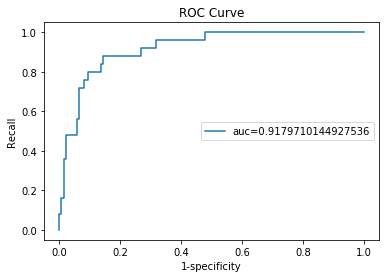

In [12]:
## DNN model utilizing TF's Keras API
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=X.shape[1:]))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy')
model.summary()
model.fit(X_train, y_train, epochs=36, batch_size=1, validation_split=0.1)
Y_pred = model.predict_classes(X_test)

## Metrics - 

print('\nPrecision score: {:.4f}'.format(precision_score(y_test, Y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, Y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, Y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test, Y_pred)))

print('\nClassification accuracy report:')
print(classification_report(y_test, Y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, Y_pred))

## Creating an ROC/AUC curve to visualize performance. 
classification_probs = model.predict_proba(X_test)
classification_AUC = roc_auc_score(y_test, classification_probs)  
print("\nAUC Index: {:.3f}".format(classification_AUC))
fpr, tpr, threshold = roc_curve(y_test,  classification_probs)
plt.plot(fpr,tpr,label="auc="+str(classification_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Precision score: 0.6471
Recall score: 0.4400
Accuracy score: 0.8773
F1 score: 0.5238

AUC Index: 0.6982608695652174


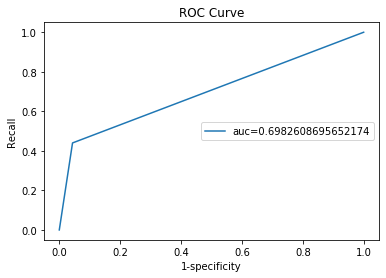

In [13]:
## Simple Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

## Decision Tree Metrics
tree_y_pred = tree.predict(X_test)
print('Precision score: {:.4f}'.format(precision_score(y_test, tree_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, tree_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, tree_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test, tree_y_pred)))

tree_probs = tree.predict_proba(X_test)
tree_AUC = roc_auc_score(y_test, tree_probs[:, 1]) ## Probability here just like lecture notes.
print("\nAUC Index:", tree_AUC)
fpr, tpr, threshold = roc_curve(y_test,  tree_probs[:, 1]) ## Probability here just like lecture notes.
plt.plot(fpr,tpr,label="auc="+str(tree_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Best Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}

Precision score: 0.6842
Recall score: 0.5200
Accuracy score: 0.8896
F1 score: 0.5909

AUC Index: 0.7382608695652174


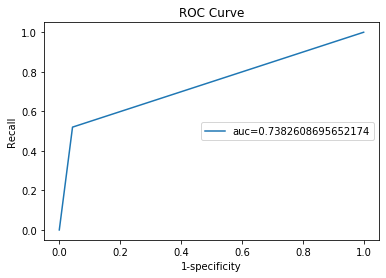

In [14]:
## Tuning hyperparameters of tree - cross-validated grid-search over a parameter grid.
optimized_tree = DecisionTreeClassifier()
params = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

opt_tree = GridSearchCV(optimized_tree, params, cv=5) ##  folds in stratified k-fold. 
opt_tree.fit(X_train,y_train)
print("Best Parameters:", opt_tree.best_params_)

## Grid Search Tree Metrics
grid_tree_y_pred = opt_tree.predict(X_test)
grid_tree_probs = opt_tree.predict_proba(X_test)
grid_tree_AUC = roc_auc_score(y_test, grid_tree_probs[:, 1])  ## Probability here just like lecture notes.

print('\nPrecision score: {:.4f}'.format(precision_score(y_test, grid_tree_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, grid_tree_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_tree_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test, grid_tree_y_pred)))

print("\nAUC Index:", grid_tree_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_tree_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(grid_tree_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show() 

Precision score: 0.5263
Recall score: 0.4000
Accuracy score: 0.8528
F1 score: 0.4545

AUC Index: 0.9002898550724637


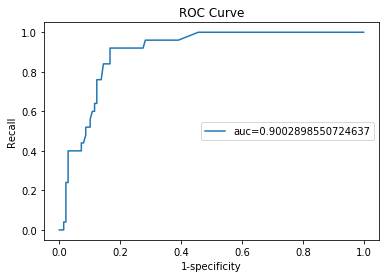

In [15]:
## Random Forest
random_forest_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, bootstrap=True)
random_forest_clf.fit(X_train, y_train)
rf_y_pred = random_forest_clf.predict(X_test)
rf_probs = random_forest_clf.predict_proba(X_test)

## Metrics
print('Precision score: {:.4f}'.format(precision_score(y_test,rf_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,rf_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,rf_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,rf_y_pred)))

rf_AUC = roc_auc_score(y_test, rf_probs[:, 1])  ## Probability here just like lecture notes.
print("\nAUC Index:", rf_AUC)
fpr, tpr, threshold = roc_curve(y_test,  rf_probs[:, 1])  ## Probability here just like lecture notes.
plt.plot(fpr,tpr,label="auc="+str(rf_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Precision score: 0.6875
Recall score: 0.4400
Accuracy score: 0.8834
F1 score: 0.5366

AUC Index: 0.9231884057971014


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


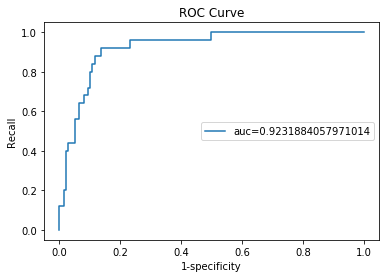

In [16]:
## Logistic Regression
log_regression = LogisticRegression().fit(X_train, y_train)
logistic_y_pred = log_regression.predict(X_test)
log_probs = log_regression.predict_proba(X_test)

## Metrics
print('Precision score: {:.4f}'.format(precision_score(y_test,logistic_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,logistic_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,logistic_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,logistic_y_pred)))

log_AUC = roc_auc_score(y_test, log_probs[:, 1])
print("\nAUC Index:", log_AUC)
fpr, tpr, threshold = roc_curve(y_test,  log_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(log_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Parameters: {'C': 0.0001}
Precision score: 0.0000
Recall score: 0.0000
Accuracy score: 0.8466
F1 score: 0.0000

AUC Index: 0.5


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


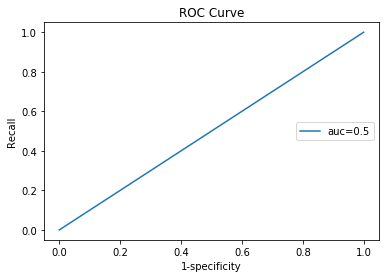

In [17]:
## Support Vector Machine (linear kernel function) - w/ hyperparameter (C) tuning. 
linear_svm = LinearSVC().fit(X_train, y_train)
params_svm = {'C': [.0001,.001,.01,.1,1,10,100,1000,10000]}

grid_svm = GridSearchCV(linear_svm, params_svm, cv=5, n_jobs=-1,scoring ='roc_auc', return_train_score=True)
grid_svm.fit(X_train, y_train)
print("Best Parameters:", grid_svm.best_params_)
grid_svm_y_pred = grid_svm.predict(X_test)

## SVM Metrics
print('Precision score: {:.4f}'.format(precision_score(y_test,grid_svm_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,grid_svm_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,grid_svm_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,grid_svm_y_pred)))

grid_svm_AUC = roc_auc_score(y_test, grid_svm_y_pred)  
print("\nAUC Index:", grid_svm_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_svm_y_pred)
plt.plot(fpr,tpr,label="auc="+str(grid_svm_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Best Parameters: {'C': 0.0001, 'gamma': 0.0001}

Precision score: 0.0000
Recall score: 0.0000
Accuracy score: 0.8466
F1 score: 0.0000

AUC Index: 0.5


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


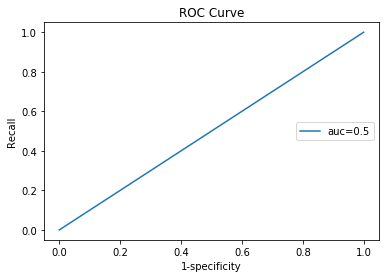

In [18]:
## Support Vector Machine (rbf/exp kernel function) - w/ hyperparameter (C and gamma) tuning. 
svm_kernel = SVC(kernel = 'rbf')

param_svm_kernel = {'C': [.0001,.001,.01,.1,1,10,100,1000,10000], 'gamma':[.0001,.001,.01,.1,1,10,100,1000,10000]}

grid_svm_kernel = GridSearchCV(svm_kernel, param_svm_kernel, cv=5, n_jobs=-1, scoring='roc_auc')
grid_svm_kernel.fit(X_train, y_train)

print("Best Parameters:", grid_svm_kernel.best_params_)
grid_rbf_svm_y_pred = grid_svm_kernel.predict(X_test)

## rbf SVM Metrics
print('\nPrecision score: {:.4f}'.format(precision_score(y_test,grid_rbf_svm_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,grid_rbf_svm_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,grid_rbf_svm_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,grid_rbf_svm_y_pred)))

grid_rbf_svm_AUC = roc_auc_score(y_test, grid_rbf_svm_y_pred)
print("\nAUC Index:", grid_rbf_svm_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_rbf_svm_y_pred)
plt.plot(fpr,tpr,label="auc="+str(grid_rbf_svm_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()